In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']
monthly_obs = pd.read_csv('../Resources/monthly_obs.csv')

warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')

gfdl_warm_mean = pd.read_csv('../Resources/gfdl_warm_mean.csv')
gfdl_neutral_mean = pd.read_csv('../Resources/gfdl_neutral_mean.csv')
gfdl_cold_mean = pd.read_csv('../Resources/gfdl_cold_mean.csv')


gfdl_warm_onset_mean= pd.read_csv('../Resources/gfdl_warm_onset_mean.csv')
gfdl_all_onset_mean= pd.read_csv('../Resources/gfdl_neutral_onset_mean.csv')
gfdl_cold_onset_mean= pd.read_csv('../Resources/gfdl_cold_onset_mean.csv')
gfdl_warm_onset = pd.read_csv('../Resources/gfdl_warm_onset.csv')
gfdl_all_onset = pd.read_csv ('../Resources/gfdl_neutral_onset.csv')
gfdl_cold_onset= pd.read_csv('../Resources/gfdl_cold_onset.csv')

#import model LDC data
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
canada['LDC_SST_CanSIPS_IC4_ONETWO'] = canada['LDC_SST_CanSIPS_IC4_ONETWO'] - 273.15
canada['LDC_SST_CanSIPS_IC4_THREE'] = canada['LDC_SST_CanSIPS_IC4_THREE'] - 273.15
canada['LDC_SST_CanSIPS_IC4_FOUR'] = canada['LDC_SST_CanSIPS_IC4_FOUR'] - 273.15
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')
cola_stat = pd.read_csv('../Resources/cola_stat.csv')

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15

#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_8 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_9 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_10 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

all_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9, 
              cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

In [197]:
#process gfdl data
def gfdl_onset_finder(dict):

    gfdl_temp = gfdl.copy()

    # Query the DataFrame
    gfdl_onset = gfdl_temp[
        (gfdl_temp['TAR'].dt.year == dict["year"]) &
        (gfdl_temp['TAR'].dt.month == dict["month"]) &
        (gfdl_temp['TAR'].dt.day == dict["day"])
    ]
    return gfdl_onset
    
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl['TAR'] = gfdl.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
gfdl['TAR'] = gfdl.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl['SZN'] = gfdl['TARGET'].map(month_to_season)
gfdl = gfdl[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GFDL_SPEAR']]
gfdl = gfdl.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the gfdl DataFrame
gfdl.loc[:, 'OBS_NINO3.4_L3'] = gfdl['TAR'].map(obs_dict)

gfdl_warm_onset_dfs = {}
gfdl_cold_onset_dfs = {}
gfdl_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    gfdl_warm_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1

gfdl_warm_onset = pd.concat([gfdl_warm_onset_dfs[key] for key in gfdl_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    gfdl_cold_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1
gfdl_cold_onset = pd.concat([gfdl_cold_onset_dfs[key] for key in gfdl_cold_onset_dfs.keys()], ignore_index=True)


gfdl_all_onset = pd.concat([gfdl_cold_onset,gfdl_warm_onset], ignore_index=True)

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_all_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM'] = gfdl_all_onset['LDC_SST_GFDL_SPEAR'] - gfdl_all_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_all_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM_OBS'] = gfdl_all_onset['OBS_NINO3.4_L3'] - gfdl_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_all_onset['VARIANCE3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['SESS'] = 1-((gfdl_all_onset['ANOM']-gfdl_all_onset['ANOM_OBS'])*(gfdl_all_onset['ANOM']-gfdl_all_onset['ANOM_OBS'])/(gfdl_all_onset['VARIANCE3.4_L3']))

#4
gfdl_all_onset['Year'] = gfdl_all_onset['TAR'].dt.year
gfdl_all_onset['ONSET'] = gfdl_all_onset['Year'].astype(str) + ' ' + gfdl_all_onset['SZN']
gfdl_all_onset = gfdl_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_warm_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM'] = gfdl_warm_onset['LDC_SST_GFDL_SPEAR'] - gfdl_warm_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_warm_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM_OBS'] = gfdl_warm_onset['OBS_NINO3.4_L3'] - gfdl_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_warm_onset['VARIANCE3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['SESS'] = 1-((gfdl_warm_onset['ANOM']-gfdl_warm_onset['ANOM_OBS'])*(gfdl_warm_onset['ANOM']-gfdl_warm_onset['ANOM_OBS'])/(gfdl_warm_onset['VARIANCE3.4_L3']))

#4
gfdl_warm_onset['Year'] = gfdl_warm_onset['TAR'].dt.year
gfdl_warm_onset['ONSET'] = gfdl_warm_onset['Year'].astype(str) + ' ' + gfdl_warm_onset['SZN']
gfdl_warm_onset = gfdl_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_cold_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM'] = gfdl_cold_onset['LDC_SST_GFDL_SPEAR'] - gfdl_cold_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_cold_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM_OBS'] = gfdl_cold_onset['OBS_NINO3.4_L3'] - gfdl_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_cold_onset['VARIANCE3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['SESS'] = 1-((gfdl_cold_onset['ANOM']-gfdl_cold_onset['ANOM_OBS'])*(gfdl_cold_onset['ANOM']-gfdl_cold_onset['ANOM_OBS'])/(gfdl_cold_onset['VARIANCE3.4_L3']))

#4
gfdl_cold_onset['Year'] = gfdl_cold_onset['TAR'].dt.year
gfdl_cold_onset['ONSET'] = gfdl_cold_onset['Year'].astype(str) + ' ' + gfdl_cold_onset['SZN']
gfdl_cold_onset = gfdl_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
gfdl_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,10.5,1994-10-01,1995-08-15,1995 JAS,0.980809,-0.453821
1,9.5,1994-11-01,1995-08-15,1995 JAS,0.994139,-0.617124
2,8.5,1994-12-01,1995-08-15,1995 JAS,0.986260,-0.647994
3,7.5,1995-01-01,1995-08-15,1995 JAS,0.687731,-0.983268
4,6.5,1995-02-01,1995-08-15,1995 JAS,0.702273,-0.973272
...,...,...,...,...,...,...
180,5.5,2018-04-01,2018-09-15,2018 ASO,0.790188,0.077496
181,4.5,2018-05-01,2018-09-15,2018 ASO,0.694985,-0.006677
182,3.5,2018-06-01,2018-09-15,2018 ASO,0.979141,0.357654
183,2.5,2018-07-01,2018-09-15,2018 ASO,0.964408,0.655192


In [198]:
#process ncep data
def ncep_onset_finder(dict):

    ncep_temp = ncep.copy()

    # Query the DataFrame
    ncep_onset = ncep_temp[
        (ncep_temp['TAR'].dt.year == dict["year"]) &
        (ncep_temp['TAR'].dt.month == dict["month"]) &
        (ncep_temp['TAR'].dt.day == dict["day"])
    ]
    return ncep_onset
    
ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep['TAR'] = ncep.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
ncep['TAR'] = ncep.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep['SZN'] = ncep['TARGET'].map(month_to_season)
ncep = ncep[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NCEP_CFSv2']]
ncep = ncep.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the ncep DataFrame
ncep.loc[:, 'OBS_NINO3.4_L3'] = ncep['TAR'].map(obs_dict)

ncep_warm_onset_dfs = {}
ncep_cold_onset_dfs = {}
ncep_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    ncep_warm_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_warm_onset = pd.concat([ncep_warm_onset_dfs[key] for key in ncep_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    ncep_cold_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1
ncep_cold_onset = pd.concat([ncep_cold_onset_dfs[key] for key in ncep_cold_onset_dfs.keys()], ignore_index=True)


ncep_all_onset = pd.concat([ncep_cold_onset,ncep_warm_onset], ignore_index=True)

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_all_onset['MEAN_SST_NCEP_CFSv2'] = ncep_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM'] = ncep_all_onset['LDC_SST_NCEP_CFSv2'] - ncep_all_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_all_onset['MEAN_OBS_NINO3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM_OBS'] = ncep_all_onset['OBS_NINO3.4_L3'] - ncep_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_all_onset['VARIANCE3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['SESS'] = 1-((ncep_all_onset['ANOM']-ncep_all_onset['ANOM_OBS'])*(ncep_all_onset['ANOM']-ncep_all_onset['ANOM_OBS'])/(ncep_all_onset['VARIANCE3.4_L3']))

#4
ncep_all_onset['Year'] = ncep_all_onset['TAR'].dt.year
ncep_all_onset['ONSET'] = ncep_all_onset['Year'].astype(str) + ' ' + ncep_all_onset['SZN']
ncep_all_onset = ncep_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_warm_onset['MEAN_SST_NCEP_CFSv2'] = ncep_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM'] = ncep_warm_onset['LDC_SST_NCEP_CFSv2'] - ncep_warm_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_warm_onset['MEAN_OBS_NINO3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM_OBS'] = ncep_warm_onset['OBS_NINO3.4_L3'] - ncep_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_warm_onset['VARIANCE3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['SESS'] = 1-((ncep_warm_onset['ANOM']-ncep_warm_onset['ANOM_OBS'])*(ncep_warm_onset['ANOM']-ncep_warm_onset['ANOM_OBS'])/(ncep_warm_onset['VARIANCE3.4_L3']))

#4
ncep_warm_onset['Year'] = ncep_warm_onset['TAR'].dt.year
ncep_warm_onset['ONSET'] = ncep_warm_onset['Year'].astype(str) + ' ' + ncep_warm_onset['SZN']
ncep_warm_onset = ncep_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_cold_onset['MEAN_SST_NCEP_CFSv2'] = ncep_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM'] = ncep_cold_onset['LDC_SST_NCEP_CFSv2'] - ncep_cold_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_cold_onset['MEAN_OBS_NINO3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM_OBS'] = ncep_cold_onset['OBS_NINO3.4_L3'] - ncep_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_cold_onset['VARIANCE3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['SESS'] = 1-((ncep_cold_onset['ANOM']-ncep_cold_onset['ANOM_OBS'])*(ncep_cold_onset['ANOM']-ncep_cold_onset['ANOM_OBS'])/(ncep_cold_onset['VARIANCE3.4_L3']))

#4
ncep_cold_onset['Year'] = ncep_cold_onset['TAR'].dt.year
ncep_cold_onset['ONSET'] = ncep_cold_onset['Year'].astype(str) + ' ' + ncep_cold_onset['SZN']
ncep_cold_onset = ncep_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
ncep_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,8.5,1994-12-01,1995-08-15,1995 JAS,0.999999,-0.559775
1,7.5,1995-01-01,1995-08-15,1995 JAS,0.904583,-0.793525
2,6.5,1995-02-01,1995-08-15,1995 JAS,0.999623,-0.544266
3,5.5,1995-03-01,1995-08-15,1995 JAS,-0.669494,-1.540000
4,4.5,1995-04-01,1995-08-15,1995 JAS,-1.270137,-1.702938
...,...,...,...,...,...,...
144,5.5,2018-04-01,2018-09-15,2018 ASO,0.688531,-0.011870
145,4.5,2018-05-01,2018-09-15,2018 ASO,0.537134,-0.121073
146,3.5,2018-06-01,2018-09-15,2018 ASO,0.990749,0.572584
147,2.5,2018-07-01,2018-09-15,2018 ASO,0.807792,0.878296


In [199]:
#process nasa data
def nasa_onset_finder(dict):

    nasa_temp = nasa.copy()

    # Query the DataFrame
    nasa_onset = nasa_temp[
        (nasa_temp['TAR'].dt.year == dict["year"]) &
        (nasa_temp['TAR'].dt.month == dict["month"]) &
        (nasa_temp['TAR'].dt.day == dict["day"])
    ]
    return nasa_onset
    
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa['TAR'] = nasa.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nasa['TAR'] = nasa.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa['SZN'] = nasa['TARGET'].map(month_to_season)
nasa = nasa[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NASA_GEOSS2S']]
nasa = nasa.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nasa DataFrame
nasa.loc[:, 'OBS_NINO3.4_L3'] = nasa['TAR'].map(obs_dict)

nasa_warm_onset_dfs = {}
nasa_cold_onset_dfs = {}
nasa_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    nasa_warm_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_warm_onset = pd.concat([nasa_warm_onset_dfs[key] for key in nasa_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nasa_cold_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1
nasa_cold_onset = pd.concat([nasa_cold_onset_dfs[key] for key in nasa_cold_onset_dfs.keys()], ignore_index=True)


nasa_all_onset = pd.concat([nasa_cold_onset,nasa_warm_onset], ignore_index=True)

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_all_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM'] = nasa_all_onset['LDC_SST_NASA_GEOSS2S'] - nasa_all_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_all_onset['MEAN_OBS_NINO3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM_OBS'] = nasa_all_onset['OBS_NINO3.4_L3'] - nasa_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_all_onset['VARIANCE3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['SESS'] = 1-((nasa_all_onset['ANOM']-nasa_all_onset['ANOM_OBS'])*(nasa_all_onset['ANOM']-nasa_all_onset['ANOM_OBS'])/(nasa_all_onset['VARIANCE3.4_L3']))

#4
nasa_all_onset['Year'] = nasa_all_onset['TAR'].dt.year
nasa_all_onset['ONSET'] = nasa_all_onset['Year'].astype(str) + ' ' + nasa_all_onset['SZN']
nasa_all_onset = nasa_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_warm_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM'] = nasa_warm_onset['LDC_SST_NASA_GEOSS2S'] - nasa_warm_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_warm_onset['MEAN_OBS_NINO3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM_OBS'] = nasa_warm_onset['OBS_NINO3.4_L3'] - nasa_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_warm_onset['VARIANCE3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['SESS'] = 1-((nasa_warm_onset['ANOM']-nasa_warm_onset['ANOM_OBS'])*(nasa_warm_onset['ANOM']-nasa_warm_onset['ANOM_OBS'])/(nasa_warm_onset['VARIANCE3.4_L3']))

#4
nasa_warm_onset['Year'] = nasa_warm_onset['TAR'].dt.year
nasa_warm_onset['ONSET'] = nasa_warm_onset['Year'].astype(str) + ' ' + nasa_warm_onset['SZN']
nasa_warm_onset = nasa_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_cold_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM'] = nasa_cold_onset['LDC_SST_NASA_GEOSS2S'] - nasa_cold_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_cold_onset['MEAN_OBS_NINO3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM_OBS'] = nasa_cold_onset['OBS_NINO3.4_L3'] - nasa_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_cold_onset['VARIANCE3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['SESS'] = 1-((nasa_cold_onset['ANOM']-nasa_cold_onset['ANOM_OBS'])*(nasa_cold_onset['ANOM']-nasa_cold_onset['ANOM_OBS'])/(nasa_cold_onset['VARIANCE3.4_L3']))

#4
nasa_cold_onset['Year'] = nasa_cold_onset['TAR'].dt.year
nasa_cold_onset['ONSET'] = nasa_cold_onset['Year'].astype(str) + ' ' + nasa_cold_onset['SZN']
nasa_cold_onset = nasa_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
nasa_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,7.5,1995-01-01,1995-08-15,1995 JAS,0.814755,-0.885776
1,6.5,1995-02-01,1995-08-15,1995 JAS,0.506513,-0.025648
2,5.5,1995-03-01,1995-08-15,1995 JAS,0.531212,-1.078834
3,4.5,1995-04-01,1995-08-15,1995 JAS,0.304087,-1.192365
4,3.5,1995-05-01,1995-08-15,1995 JAS,0.582546,-1.049547
...,...,...,...,...,...,...
126,5.5,2018-04-01,2018-09-15,2018 ASO,-0.302326,-0.532745
127,4.5,2018-05-01,2018-09-15,2018 ASO,-0.861698,-0.732166
128,3.5,2018-06-01,2018-09-15,2018 ASO,0.992562,0.409625
129,2.5,2018-07-01,2018-09-15,2018 ASO,0.869775,0.164310


In [200]:
#process canada data
def canada_onset_finder(dict):

    canada_temp = canada.copy()

    # Query the DataFrame
    canada_onset = canada_temp[
        (canada_temp['TAR'].dt.year == dict["year"]) &
        (canada_temp['TAR'].dt.month == dict["month"]) &
        (canada_temp['TAR'].dt.day == dict["day"])
    ]
    return canada_onset
    
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada['TAR'] = canada.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canada['TAR'] = canada.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada['SZN'] = canada['TARGET'].map(month_to_season)
canada = canada[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanSIPS_IC4']]
canada = canada.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canada DataFrame
canada.loc[:, 'OBS_NINO3.4_L3'] = canada['TAR'].map(obs_dict)

canada_warm_onset_dfs = {}
canada_cold_onset_dfs = {}
canada_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    canada_warm_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_warm_onset = pd.concat([canada_warm_onset_dfs[key] for key in canada_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canada_cold_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1
canada_cold_onset = pd.concat([canada_cold_onset_dfs[key] for key in canada_cold_onset_dfs.keys()], ignore_index=True)


canada_all_onset = pd.concat([canada_cold_onset,canada_warm_onset], ignore_index=True)

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_all_onset['MEAN_SST_CanSIPS_IC4'] = canada_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM'] = canada_all_onset['LDC_SST_CanSIPS_IC4'] - canada_all_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_all_onset['MEAN_OBS_NINO3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM_OBS'] = canada_all_onset['OBS_NINO3.4_L3'] - canada_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_all_onset['VARIANCE3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['SESS'] = 1-((canada_all_onset['ANOM']-canada_all_onset['ANOM_OBS'])*(canada_all_onset['ANOM']-canada_all_onset['ANOM_OBS'])/(canada_all_onset['VARIANCE3.4_L3']))

#4
canada_all_onset['Year'] = canada_all_onset['TAR'].dt.year
canada_all_onset['ONSET'] = canada_all_onset['Year'].astype(str) + ' ' + canada_all_onset['SZN']
canada_all_onset = canada_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_warm_onset['MEAN_SST_CanSIPS_IC4'] = canada_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM'] = canada_warm_onset['LDC_SST_CanSIPS_IC4'] - canada_warm_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_warm_onset['MEAN_OBS_NINO3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM_OBS'] = canada_warm_onset['OBS_NINO3.4_L3'] - canada_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_warm_onset['VARIANCE3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['SESS'] = 1-((canada_warm_onset['ANOM']-canada_warm_onset['ANOM_OBS'])*(canada_warm_onset['ANOM']-canada_warm_onset['ANOM_OBS'])/(canada_warm_onset['VARIANCE3.4_L3']))

#4
canada_warm_onset['Year'] = canada_warm_onset['TAR'].dt.year
canada_warm_onset['ONSET'] = canada_warm_onset['Year'].astype(str) + ' ' + canada_warm_onset['SZN']
canada_warm_onset = canada_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_cold_onset['MEAN_SST_CanSIPS_IC4'] = canada_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM'] = canada_cold_onset['LDC_SST_CanSIPS_IC4'] - canada_cold_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_cold_onset['MEAN_OBS_NINO3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM_OBS'] = canada_cold_onset['OBS_NINO3.4_L3'] - canada_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_cold_onset['VARIANCE3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['SESS'] = 1-((canada_cold_onset['ANOM']-canada_cold_onset['ANOM_OBS'])*(canada_cold_onset['ANOM']-canada_cold_onset['ANOM_OBS'])/(canada_cold_onset['VARIANCE3.4_L3']))

#4
canada_cold_onset['Year'] = canada_cold_onset['TAR'].dt.year
canada_cold_onset['ONSET'] = canada_cold_onset['Year'].astype(str) + ' ' + canada_cold_onset['SZN']
canada_cold_onset = canada_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
canada_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,10.5,1994-10-01,1995-08-15,1995 JAS,0.995622,-0.609237
1,9.5,1994-11-01,1995-08-15,1995 JAS,0.884880,-0.301397
2,8.5,1994-12-01,1995-08-15,1995 JAS,0.905334,-0.325400
3,7.5,1995-01-01,1995-08-15,1995 JAS,0.998997,-0.534953
4,6.5,1995-02-01,1995-08-15,1995 JAS,0.967593,-0.422323
...,...,...,...,...,...,...
180,5.5,2018-04-01,2018-09-15,2018 ASO,0.995235,0.425003
181,4.5,2018-05-01,2018-09-15,2018 ASO,0.989507,0.395163
182,3.5,2018-06-01,2018-09-15,2018 ASO,0.988601,0.391293
183,2.5,2018-07-01,2018-09-15,2018 ASO,0.997978,0.526833


In [201]:
#process canesm data
def canesm_onset_finder(dict):

    canesm_temp = canesm.copy()

    # Query the DataFrame
    canesm_onset = canesm_temp[
        (canesm_temp['TAR'].dt.year == dict["year"]) &
        (canesm_temp['TAR'].dt.month == dict["month"]) &
        (canesm_temp['TAR'].dt.day == dict["day"])
    ]
    return canesm_onset
    
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm['TAR'] = canesm.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canesm['TAR'] = canesm.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm['SZN'] = canesm['TARGET'].map(month_to_season)
canesm = canesm[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanESM5']]
canesm = canesm.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canesm DataFrame
canesm.loc[:, 'OBS_NINO3.4_L3'] = canesm['TAR'].map(obs_dict)

canesm_warm_onset_dfs = {}
canesm_cold_onset_dfs = {}
canesm_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    canesm_warm_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_warm_onset = pd.concat([canesm_warm_onset_dfs[key] for key in canesm_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canesm_cold_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1
canesm_cold_onset = pd.concat([canesm_cold_onset_dfs[key] for key in canesm_cold_onset_dfs.keys()], ignore_index=True)


canesm_all_onset = pd.concat([canesm_cold_onset,canesm_warm_onset], ignore_index=True)

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_all_onset['MEAN_SST_CanESM5'] = canesm_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM'] = canesm_all_onset['LDC_SST_CanESM5'] - canesm_all_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_all_onset['MEAN_OBS_NINO3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM_OBS'] = canesm_all_onset['OBS_NINO3.4_L3'] - canesm_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_all_onset['VARIANCE3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['SESS'] = 1-((canesm_all_onset['ANOM']-canesm_all_onset['ANOM_OBS'])*(canesm_all_onset['ANOM']-canesm_all_onset['ANOM_OBS'])/(canesm_all_onset['VARIANCE3.4_L3']))

#4
canesm_all_onset['Year'] = canesm_all_onset['TAR'].dt.year
canesm_all_onset['ONSET'] = canesm_all_onset['Year'].astype(str) + ' ' + canesm_all_onset['SZN']
canesm_all_onset = canesm_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_warm_onset['MEAN_SST_CanESM5'] = canesm_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM'] = canesm_warm_onset['LDC_SST_CanESM5'] - canesm_warm_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_warm_onset['MEAN_OBS_NINO3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM_OBS'] = canesm_warm_onset['OBS_NINO3.4_L3'] - canesm_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_warm_onset['VARIANCE3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['SESS'] = 1-((canesm_warm_onset['ANOM']-canesm_warm_onset['ANOM_OBS'])*(canesm_warm_onset['ANOM']-canesm_warm_onset['ANOM_OBS'])/(canesm_warm_onset['VARIANCE3.4_L3']))

#4
canesm_warm_onset['Year'] = canesm_warm_onset['TAR'].dt.year
canesm_warm_onset['ONSET'] = canesm_warm_onset['Year'].astype(str) + ' ' + canesm_warm_onset['SZN']
canesm_warm_onset = canesm_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_cold_onset['MEAN_SST_CanESM5'] = canesm_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM'] = canesm_cold_onset['LDC_SST_CanESM5'] - canesm_cold_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_cold_onset['MEAN_OBS_NINO3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM_OBS'] = canesm_cold_onset['OBS_NINO3.4_L3'] - canesm_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_cold_onset['VARIANCE3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['SESS'] = 1-((canesm_cold_onset['ANOM']-canesm_cold_onset['ANOM_OBS'])*(canesm_cold_onset['ANOM']-canesm_cold_onset['ANOM_OBS'])/(canesm_cold_onset['VARIANCE3.4_L3']))

#4
canesm_cold_onset['Year'] = canesm_cold_onset['TAR'].dt.year
canesm_cold_onset['ONSET'] = canesm_cold_onset['Year'].astype(str) + ' ' + canesm_cold_onset['SZN']
canesm_cold_onset = canesm_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
canesm_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,10.5,1994-10-01,1995-08-15,1995 JAS,0.987529,-0.474213
1,9.5,1994-11-01,1995-08-15,1995 JAS,0.587823,-0.071563
2,8.5,1994-12-01,1995-08-15,1995 JAS,0.615419,-0.088163
3,7.5,1995-01-01,1995-08-15,1995 JAS,0.999278,-0.538593
4,6.5,1995-02-01,1995-08-15,1995 JAS,0.972204,-0.432420
...,...,...,...,...,...,...
180,5.5,2018-04-01,2018-09-15,2018 ASO,0.782688,0.070247
181,4.5,2018-05-01,2018-09-15,2018 ASO,0.780581,0.068233
182,3.5,2018-06-01,2018-09-15,2018 ASO,0.814099,0.101517
183,2.5,2018-07-01,2018-09-15,2018 ASO,0.948646,0.284237


In [202]:
#process nemo data
def nemo_onset_finder(dict):

    nemo_temp = nemo.copy()

    # Query the DataFrame
    nemo_onset = nemo_temp[
        (nemo_temp['TAR'].dt.year == dict["year"]) &
        (nemo_temp['TAR'].dt.month == dict["month"]) &
        (nemo_temp['TAR'].dt.day == dict["day"])
    ]
    return nemo_onset
    
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo['TAR'] = nemo.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo['TAR'] = nemo.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo['SZN'] = nemo['TARGET'].map(month_to_season)
nemo = nemo[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM52_NEMO']]
nemo = nemo.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nemo DataFrame
nemo.loc[:, 'OBS_NINO3.4_L3'] = nemo['TAR'].map(obs_dict)

nemo_warm_onset_dfs = {}
nemo_cold_onset_dfs = {}
nemo_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    nemo_warm_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_warm_onset = pd.concat([nemo_warm_onset_dfs[key] for key in nemo_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nemo_cold_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1
nemo_cold_onset = pd.concat([nemo_cold_onset_dfs[key] for key in nemo_cold_onset_dfs.keys()], ignore_index=True)


nemo_all_onset = pd.concat([nemo_cold_onset,nemo_warm_onset], ignore_index=True)

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_all_onset['MEAN_SST_GEM52_NEMO'] = nemo_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM'] = nemo_all_onset['LDC_SST_GEM52_NEMO'] - nemo_all_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_all_onset['MEAN_OBS_NINO3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM_OBS'] = nemo_all_onset['OBS_NINO3.4_L3'] - nemo_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_all_onset['VARIANCE3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['SESS'] = 1-((nemo_all_onset['ANOM']-nemo_all_onset['ANOM_OBS'])*(nemo_all_onset['ANOM']-nemo_all_onset['ANOM_OBS'])/(nemo_all_onset['VARIANCE3.4_L3']))

#4
nemo_all_onset['Year'] = nemo_all_onset['TAR'].dt.year
nemo_all_onset['ONSET'] = nemo_all_onset['Year'].astype(str) + ' ' + nemo_all_onset['SZN']
nemo_all_onset = nemo_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_warm_onset['MEAN_SST_GEM52_NEMO'] = nemo_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM'] = nemo_warm_onset['LDC_SST_GEM52_NEMO'] - nemo_warm_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_warm_onset['MEAN_OBS_NINO3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM_OBS'] = nemo_warm_onset['OBS_NINO3.4_L3'] - nemo_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_warm_onset['VARIANCE3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['SESS'] = 1-((nemo_warm_onset['ANOM']-nemo_warm_onset['ANOM_OBS'])*(nemo_warm_onset['ANOM']-nemo_warm_onset['ANOM_OBS'])/(nemo_warm_onset['VARIANCE3.4_L3']))

#4
nemo_warm_onset['Year'] = nemo_warm_onset['TAR'].dt.year
nemo_warm_onset['ONSET'] = nemo_warm_onset['Year'].astype(str) + ' ' + nemo_warm_onset['SZN']
nemo_warm_onset = nemo_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_cold_onset['MEAN_SST_GEM52_NEMO'] = nemo_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM'] = nemo_cold_onset['LDC_SST_GEM52_NEMO'] - nemo_cold_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_cold_onset['MEAN_OBS_NINO3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM_OBS'] = nemo_cold_onset['OBS_NINO3.4_L3'] - nemo_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_cold_onset['VARIANCE3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['SESS'] = 1-((nemo_cold_onset['ANOM']-nemo_cold_onset['ANOM_OBS'])*(nemo_cold_onset['ANOM']-nemo_cold_onset['ANOM_OBS'])/(nemo_cold_onset['VARIANCE3.4_L3']))

#4
nemo_cold_onset['Year'] = nemo_cold_onset['TAR'].dt.year
nemo_cold_onset['ONSET'] = nemo_cold_onset['Year'].astype(str) + ' ' + nemo_cold_onset['SZN']
nemo_cold_onset = nemo_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
nemo_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,10.5,1994-10-01,1995-08-15,1995 JAS,0.940543,-0.744130
1,9.5,1994-11-01,1995-08-15,1995 JAS,0.998663,-0.531243
2,8.5,1994-12-01,1995-08-15,1995 JAS,0.999977,-0.562603
3,7.5,1995-01-01,1995-08-15,1995 JAS,0.998662,-0.531233
4,6.5,1995-02-01,1995-08-15,1995 JAS,0.962625,-0.412220
...,...,...,...,...,...,...
180,5.5,2018-04-01,2018-09-15,2018 ASO,0.892345,0.779760
181,4.5,2018-05-01,2018-09-15,2018 ASO,0.930588,0.722013
182,3.5,2018-06-01,2018-09-15,2018 ASO,0.952633,0.681080
183,2.5,2018-07-01,2018-09-15,2018 ASO,0.899736,0.769520


In [203]:
#process cola data
def cola_onset_finder(dict):

    cola_temp = cola.copy()

    # Query the DataFrame
    cola_onset = cola_temp[
        (cola_temp['TAR'].dt.year == dict["year"]) &
        (cola_temp['TAR'].dt.month == dict["month"]) &
        (cola_temp['TAR'].dt.day == dict["day"])
    ]
    return cola_onset
    
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola['TAR'] = cola.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
cola['TAR'] = cola.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola['SZN'] = cola['TARGET'].map(month_to_season)
cola = cola[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_COLA_CESM1']]
cola = cola.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the cola DataFrame
cola.loc[:, 'OBS_NINO3.4_L3'] = cola['TAR'].map(obs_dict)

cola_warm_onset_dfs = {}
cola_cold_onset_dfs = {}
cola_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    cola_warm_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_warm_onset = pd.concat([cola_warm_onset_dfs[key] for key in cola_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    cola_cold_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1
cola_cold_onset = pd.concat([cola_cold_onset_dfs[key] for key in cola_cold_onset_dfs.keys()], ignore_index=True)


cola_all_onset = pd.concat([cola_cold_onset,cola_warm_onset], ignore_index=True)

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_all_onset['MEAN_SST_COLA_CESM1'] = cola_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM'] = cola_all_onset['LDC_SST_COLA_CESM1'] - cola_all_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_all_onset['MEAN_OBS_NINO3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM_OBS'] = cola_all_onset['OBS_NINO3.4_L3'] - cola_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_all_onset['VARIANCE3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['SESS'] = 1-((cola_all_onset['ANOM']-cola_all_onset['ANOM_OBS'])*(cola_all_onset['ANOM']-cola_all_onset['ANOM_OBS'])/(cola_all_onset['VARIANCE3.4_L3']))

#4
cola_all_onset['Year'] = cola_all_onset['TAR'].dt.year
cola_all_onset['ONSET'] = cola_all_onset['Year'].astype(str) + ' ' + cola_all_onset['SZN']
cola_all_onset = cola_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_warm_onset['MEAN_SST_COLA_CESM1'] = cola_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM'] = cola_warm_onset['LDC_SST_COLA_CESM1'] - cola_warm_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_warm_onset['MEAN_OBS_NINO3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM_OBS'] = cola_warm_onset['OBS_NINO3.4_L3'] - cola_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_warm_onset['VARIANCE3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['SESS'] = 1-((cola_warm_onset['ANOM']-cola_warm_onset['ANOM_OBS'])*(cola_warm_onset['ANOM']-cola_warm_onset['ANOM_OBS'])/(cola_warm_onset['VARIANCE3.4_L3']))

#4
cola_warm_onset['Year'] = cola_warm_onset['TAR'].dt.year
cola_warm_onset['ONSET'] = cola_warm_onset['Year'].astype(str) + ' ' + cola_warm_onset['SZN']
cola_warm_onset = cola_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_cold_onset['MEAN_SST_COLA_CESM1'] = cola_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM'] = cola_cold_onset['LDC_SST_COLA_CESM1'] - cola_cold_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_cold_onset['MEAN_OBS_NINO3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM_OBS'] = cola_cold_onset['OBS_NINO3.4_L3'] - cola_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_cold_onset['VARIANCE3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['SESS'] = 1-((cola_cold_onset['ANOM']-cola_cold_onset['ANOM_OBS'])*(cola_cold_onset['ANOM']-cola_cold_onset['ANOM_OBS'])/(cola_cold_onset['VARIANCE3.4_L3']))

#4
cola_cold_onset['Year'] = cola_cold_onset['TAR'].dt.year
cola_cold_onset['ONSET'] = cola_cold_onset['Year'].astype(str) + ' ' + cola_cold_onset['SZN']
cola_cold_onset = cola_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM']]
    
cola_all_onset





,L,MON,TAR,ONSET,SESS,ANOM
0,10.5,1994-10-01,1995-08-15,1995 JAS,0.995994,-0.607052
1,9.5,1994-11-01,1995-08-15,1995 JAS,0.182328,0.127540
2,8.5,1994-12-01,1995-08-15,1995 JAS,0.083801,0.167727
3,7.5,1995-01-01,1995-08-15,1995 JAS,0.886718,-0.814539
4,6.5,1995-02-01,1995-08-15,1995 JAS,-0.538477,-1.500720
...,...,...,...,...,...,...
180,5.5,2018-04-01,2018-09-15,2018 ASO,0.822876,0.862615
181,4.5,2018-05-01,2018-09-15,2018 ASO,0.983008,0.603109
182,3.5,2018-06-01,2018-09-15,2018 ASO,0.247179,1.261727
183,2.5,2018-07-01,2018-09-15,2018 ASO,0.207759,1.281760


In [204]:
gfdl_all_mesh = gfdl_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
gfdl_all_mesh = gfdl_all_mesh.fillna(np.nan)

gfdl_cold_mesh = gfdl_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
gfdl_cold_mesh = gfdl_cold_mesh.fillna(np.nan)

gfdl_warm_mesh = gfdl_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
gfdl_warm_mesh = gfdl_warm_mesh.fillna(np.nan)

gfdl_cold_mesh

ONSET,1995 JAS,1998 JJA,2005 OND,2007 MJJ,2008 OND,2010 MJJ,2011 JJA,2016 JAS,2017 SON,2020 JAS
L,,,,,,,,,,
1.5,-0.798656,-1.346933,-0.130526,-0.302419,-0.135606,0.056181,0.114797,-0.246416,-0.683606,-0.461726
2.5,-0.743088,-0.940530,-0.254544,-0.133973,-0.181064,-0.256943,0.248550,-0.622038,-0.176120,-0.612338
3.5,-1.350825,-1.017783,-0.182659,-0.196138,-0.241599,-0.495928,0.394987,-0.935655,-0.131164,-0.327735
4.5,-0.744462,-0.888351,-0.485937,-0.198036,-0.301857,-0.376936,0.224049,-0.979812,0.082802,-0.502932
5.5,-0.768446,-0.542343,-0.681841,-0.141025,0.058869,-0.115835,0.402037,-0.667156,0.402210,-0.330786
6.5,-0.973272,-0.246638,-0.744375,-0.010190,-0.302805,0.109940,0.235612,-0.511692,0.685326,-0.350072
7.5,-0.983268,-0.318769,-0.293247,-0.121470,-0.351837,0.360750,0.247651,-0.447928,0.980785,-0.073468
8.5,-0.647994,-0.404738,-0.469768,0.216064,-0.479118,0.427944,-0.107108,-0.428334,0.575422,0.430256
9.5,-0.617124,-0.625068,-0.009465,0.206459,-0.421355,0.565239,-0.165958,-0.174734,0.470039,0.188596


In [205]:
observed_onset_anom_all = {
    '1991 MJJ': 0.5133333333333333,
    '1994 ASO': 0.5866666666666668,
    '1995 JAS': -0.56,
    '1997 AMJ': 0.63,
    '1998 JJA': -0.886666667,
    '2002 MJJ': 0.59,
    '2004 JJA': 0.46,
    '2005 OND': -0.523333333,
    '2006 ASO': 0.5366666666666666,
    '2007 MJJ': -0.47,
    '2008 OND': -0.556666667,
    '2009 JJA': 0.45,
    '2010 MJJ': -0.66,
    '2011 JJA': -0.486666667,
    '2014 SON': 0.4933333333333334,
    '2016 JAS': -0.546666667,
    '2017 SON': -0.653333333,
    '2018 ASO': 0.4866666666666668,
    '2020 JAS': -0.573333333
}


observed_onset_anmom_cold = {
    '1995 JAS': -0.56,  # example values, replace with actual ANOM values
    '1998 JJA': -0.886666667,
    '2005 OND': -0.523333333,
    '2007 MJJ': -0.47,
    '2008 OND': -0.556666667,
    '2010 MJJ': -0.66,
    '2011 JJA': -0.486666667,
    '2016 JAS': -0.546666667,
    '2017 SON': -0.653333333,
    '2020 JAS': -0.573333333
}

observed_onset_anmom_warm = {
    '1991 MJJ': 0.5133333333333333,  
    '1994 ASO': 0.5866666666666668,
    '1997 AMJ': 0.63,
    '2002 MJJ': 0.59,
    '2004 JJA': 0.46,
    '2006 ASO': 0.5366666666666666,
    '2009 JJA': 0.45,
    '2014 SON': 0.4933333333333334,
    '2018 ASO': 0.4866666666666668
}


observed_onset_anom_all_series = pd.Series(observed_onset_anom_all, name='OBS')
new_row_df = pd.DataFrame(observed_onset_anom_all_series).transpose()

gfdl_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
gfdl_all_mesh = gfdl_all_mesh.reindex(index=['OBS', *gfdl_all_mesh.index.difference(['OBS'])])
gfdl_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
gfdl_warm_mesh = gfdl_warm_mesh.reindex(index=['OBS', *gfdl_warm_mesh.index.difference(['OBS'])])
gfdl_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
gfdl_cold_mesh = gfdl_cold_mesh.reindex(index=['OBS', *gfdl_cold_mesh.index.difference(['OBS'])])

gfdl_cold_mesh

ONSET,1995 JAS,1998 JJA,2005 OND,2007 MJJ,2008 OND,2010 MJJ,2011 JJA,2016 JAS,2017 SON,2020 JAS
L,,,,,,,,,,
OBS,-0.560000,-0.886667,-0.523333,-0.470000,-0.556667,-0.660000,-0.486667,-0.546667,-0.653333,-0.573333
1.5,-0.798656,-1.346933,-0.130526,-0.302419,-0.135606,0.056181,0.114797,-0.246416,-0.683606,-0.461726
2.5,-0.743088,-0.940530,-0.254544,-0.133973,-0.181064,-0.256943,0.248550,-0.622038,-0.176120,-0.612338
3.5,-1.350825,-1.017783,-0.182659,-0.196138,-0.241599,-0.495928,0.394987,-0.935655,-0.131164,-0.327735
4.5,-0.744462,-0.888351,-0.485937,-0.198036,-0.301857,-0.376936,0.224049,-0.979812,0.082802,-0.502932
5.5,-0.768446,-0.542343,-0.681841,-0.141025,0.058869,-0.115835,0.402037,-0.667156,0.402210,-0.330786
6.5,-0.973272,-0.246638,-0.744375,-0.010190,-0.302805,0.109940,0.235612,-0.511692,0.685326,-0.350072
7.5,-0.983268,-0.318769,-0.293247,-0.121470,-0.351837,0.360750,0.247651,-0.447928,0.980785,-0.073468
8.5,-0.647994,-0.404738,-0.469768,0.216064,-0.479118,0.427944,-0.107108,-0.428334,0.575422,0.430256


In [206]:
ncep_all_mesh = ncep_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
ncep_all_mesh = ncep_all_mesh.fillna(np.nan)

ncep_cold_mesh = ncep_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
ncep_cold_mesh = ncep_cold_mesh.fillna(np.nan)

ncep_warm_mesh = ncep_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
ncep_warm_mesh = ncep_warm_mesh.fillna(np.nan)

ncep_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
ncep_all_mesh = ncep_all_mesh.reindex(index=['OBS', *ncep_all_mesh.index.difference(['OBS'])])
ncep_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
ncep_warm_mesh = ncep_warm_mesh.reindex(index=['OBS', *ncep_warm_mesh.index.difference(['OBS'])])
ncep_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
ncep_cold_mesh = ncep_cold_mesh.reindex(index=['OBS', *ncep_cold_mesh.index.difference(['OBS'])])
#add NaN for ncep
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_cold_mesh.columns)
ncep_cold_mesh = pd.concat([ncep_cold_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_warm_mesh.columns)
ncep_warm_mesh = pd.concat([ncep_warm_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_all_mesh.columns)
ncep_all_mesh = pd.concat([ncep_all_mesh, new_rows])

nasa_all_mesh = nasa_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
nasa_all_mesh = nasa_all_mesh.fillna(np.nan)

nasa_cold_mesh = nasa_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
nasa_cold_mesh = nasa_cold_mesh.fillna(np.nan)
nasa_warm_mesh = nasa_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
nasa_warm_mesh = nasa_warm_mesh.fillna(np.nan)

#add NaN for nasa
new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_cold_mesh.columns)
nasa_cold_mesh = pd.concat([nasa_cold_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_all_mesh.columns)
nasa_all_mesh = pd.concat([nasa_all_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_warm_mesh.columns)
nasa_warm_mesh = pd.concat([nasa_warm_mesh, new_rows])


nasa_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
nasa_all_mesh = nasa_all_mesh.reindex(index=['OBS', *nasa_all_mesh.index.difference(['OBS'])])
nasa_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
nasa_warm_mesh = nasa_warm_mesh.reindex(index=['OBS', *nasa_warm_mesh.index.difference(['OBS'])])
nasa_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
nasa_cold_mesh = nasa_cold_mesh.reindex(index=['OBS', *nasa_cold_mesh.index.difference(['OBS'])])

cola_all_mesh = cola_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
cola_all_mesh = cola_all_mesh.fillna(np.nan)

cola_cold_mesh = cola_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
cola_cold_mesh = cola_cold_mesh.fillna(np.nan)

cola_warm_mesh = cola_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
cola_warm_mesh = cola_warm_mesh.fillna(np.nan)

cola_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
cola_all_mesh = cola_all_mesh.reindex(index=['OBS', *cola_all_mesh.index.difference(['OBS'])])
cola_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
cola_warm_mesh = cola_warm_mesh.reindex(index=['OBS', *cola_warm_mesh.index.difference(['OBS'])])
cola_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
cola_cold_mesh = cola_cold_mesh.reindex(index=['OBS', *cola_cold_mesh.index.difference(['OBS'])])

canada_all_mesh = canada_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
canada_all_mesh = canada_all_mesh.fillna(np.nan)

canada_cold_mesh = canada_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
canada_cold_mesh = canada_cold_mesh.fillna(np.nan)

canada_warm_mesh = canada_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
canada_warm_mesh = canada_warm_mesh.fillna(np.nan)

canada_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
canada_all_mesh = canada_all_mesh.reindex(index=['OBS', *canada_all_mesh.index.difference(['OBS'])])
canada_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
canada_warm_mesh = canada_warm_mesh.reindex(index=['OBS', *canada_warm_mesh.index.difference(['OBS'])])
canada_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
canada_cold_mesh = canada_cold_mesh.reindex(index=['OBS', *canada_cold_mesh.index.difference(['OBS'])])

canesm_all_mesh = canesm_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
canesm_all_mesh = canesm_all_mesh.fillna(np.nan)

canesm_cold_mesh = canesm_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
canesm_cold_mesh = canesm_cold_mesh.fillna(np.nan)

canesm_warm_mesh = canesm_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
canesm_warm_mesh = canesm_warm_mesh.fillna(np.nan)

canesm_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
canesm_all_mesh = canesm_all_mesh.reindex(index=['OBS', *canesm_all_mesh.index.difference(['OBS'])])
canesm_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
canesm_warm_mesh = canesm_warm_mesh.reindex(index=['OBS', *canesm_warm_mesh.index.difference(['OBS'])])
canesm_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
canesm_cold_mesh = canesm_cold_mesh.reindex(index=['OBS', *canesm_cold_mesh.index.difference(['OBS'])])

nemo_all_mesh = nemo_all_onset.pivot(index='L', columns='ONSET', values='ANOM')
nemo_all_mesh = nemo_all_mesh.fillna(np.nan)

nemo_cold_mesh = nemo_cold_onset.pivot(index='L', columns='ONSET', values='ANOM')
nemo_cold_mesh = nemo_cold_mesh.fillna(np.nan)

nemo_warm_mesh = nemo_warm_onset.pivot(index='L', columns='ONSET', values='ANOM')
nemo_warm_mesh = nemo_warm_mesh.fillna(np.nan)

nemo_all_mesh.loc['OBS'] = new_row_df.loc['OBS']
nemo_all_mesh = nemo_all_mesh.reindex(index=['OBS', *nemo_all_mesh.index.difference(['OBS'])])
nemo_warm_mesh.loc['OBS'] = new_row_df.loc['OBS']
nemo_warm_mesh = nemo_warm_mesh.reindex(index=['OBS', *nemo_warm_mesh.index.difference(['OBS'])])
nemo_cold_mesh.loc['OBS'] = new_row_df.loc['OBS']
nemo_cold_mesh = nemo_cold_mesh.reindex(index=['OBS', *nemo_cold_mesh.index.difference(['OBS'])])


nasa_warm_mesh


ONSET,1991 MJJ,1994 ASO,1997 AMJ,2002 MJJ,2004 JJA,2006 ASO,2009 JJA,2014 SON,2018 ASO
OBS,0.513333,0.586667,0.630000,0.590000,0.460000,0.536667,0.450000,0.493333,0.486667
1.5,0.135057,-0.079374,0.539315,0.198007,0.412806,0.438436,0.557076,1.011208,0.403946
2.5,-0.242244,0.049770,0.421749,0.398836,0.331617,0.042030,0.294567,0.680836,0.164310
3.5,-0.180289,0.399885,0.072132,0.667851,0.292256,0.399295,-0.227194,0.598869,0.409625
4.5,0.628863,0.349624,0.683338,1.086343,0.490863,-0.076876,-0.146467,0.928673,-0.732166
5.5,-0.533120,0.267875,0.231624,0.212580,0.266970,0.100435,0.050230,0.619998,-0.532745
6.5,NaN,-0.696199,0.027513,1.082230,0.133893,-0.083939,0.546903,1.803382,-0.480439
7.5,NaN,0.033293,0.168252,0.711505,-0.437869,0.222793,0.072581,1.969475,-0.060517
8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
cold_onset_order = ['2007 MJJ', '2010 MJJ', '1998 JJA', '2011 JJA', '1995 JAS', '2016 JAS', '2020 JAS', '2017 SON', '2005 OND','2008 OND']
warm_onset_order = ['1997 AMJ', '1991 MJJ', '2002 MJJ', '2004 JJA', '2009 JJA', '1994 ASO', '2006 ASO', '2018 ASO', '2014 SON']

gfdl_cold_mesh = gfdl_cold_mesh.reindex(columns=cold_onset_order)
gfdl_warm_mesh = gfdl_warm_mesh.reindex(columns=warm_onset_order)
cola_cold_mesh = cola_cold_mesh.reindex(columns=cold_onset_order)
cola_warm_mesh = cola_warm_mesh.reindex(columns=warm_onset_order)
canada_cold_mesh = canada_cold_mesh.reindex(columns=cold_onset_order)
canada_warm_mesh = canada_warm_mesh.reindex(columns=warm_onset_order)
canesm_cold_mesh = canesm_cold_mesh.reindex(columns=cold_onset_order)
canesm_warm_mesh = canesm_warm_mesh.reindex(columns=warm_onset_order)
nemo_cold_mesh = nemo_cold_mesh.reindex(columns=cold_onset_order)
nemo_warm_mesh = nemo_warm_mesh.reindex(columns=warm_onset_order)
nasa_cold_mesh = nasa_cold_mesh.reindex(columns=cold_onset_order)
nasa_warm_mesh = nasa_warm_mesh.reindex(columns=warm_onset_order)
ncep_cold_mesh = ncep_cold_mesh.reindex(columns=cold_onset_order)
ncep_warm_mesh = ncep_warm_mesh.reindex(columns=warm_onset_order)
ncep_warm_mesh

ONSET,1997 AMJ,1991 MJJ,2002 MJJ,2004 JJA,2009 JJA,1994 ASO,2006 ASO,2018 ASO,2014 SON
OBS,0.630000,0.513333,0.590000,0.460000,0.450000,0.586667,0.536667,0.486667,0.493333
1.5,0.129049,-0.006859,0.440541,0.560371,0.883931,-0.106714,0.636116,0.897906,0.711175
2.5,-0.136425,-0.298565,0.323965,0.304166,0.967316,-0.179824,0.572206,0.878296,1.059925
3.5,-0.318673,-0.144416,0.624764,0.756195,0.927895,-0.121896,0.634984,0.572584,1.073385
4.5,-0.042727,-0.291092,0.411178,0.649827,0.920267,-0.413743,0.309017,-0.121073,1.274956
5.5,0.108965,-0.263565,-0.144415,0.291699,1.054269,-0.677560,0.469900,-0.011870,1.443413
6.5,0.151067,NaN,0.257938,0.144615,0.924815,-1.083507,0.883043,-0.537957,1.479396
7.5,-0.011469,NaN,0.276298,0.313725,0.463245,-0.553846,0.097914,-0.484466,1.115491
8.5,-0.154120,NaN,0.410004,0.121644,0.129084,-0.531987,0.203933,-0.356157,1.380710
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
'''
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(canesm_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_cold_mesh.values

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bwr', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c, label='SESS',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.ylabel('Lead Time', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(a) CanESM5', size = 22)

# Adjust y-ticks to show original string labels
#plt.yticks(ticks=y, labels=canesm_cold_mesh.index , size = 15)
y_labels = canesm_cold_mesh.index.tolist()
adjusted_y_labels = [str(float(label)-1) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_cold_mesh.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bwr')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/SESS/canesm_Cold_Onset_SESS.png', format='png')
plt.show()
'''

"\nfrom matplotlib.colors import BoundaryNorm, Normalize, to_rgba\n# Extract the x and y values\nx = np.arange(len(canesm_cold_mesh.columns))  # Numerical indices for Lead times (L)\ny = np.arange(len(canesm_cold_mesh.index))    # Numerical indices for Target times (TAR)\nZ = canesm_cold_mesh.values\n\nboundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1 to 1 with interval of 0.25\nnorm = BoundaryNorm(boundaries, ncolors=256, clip=True)\n\n# Create the meshgrid\nx_mesh, y_mesh = np.meshgrid(x, y)\n\n# Plot using pcolormesh\nplt.rcParams['font.family'] = 'sans-serif'\nplt.rcParams['font.sans-serif'] = ['Arial']\nplt.figure(figsize=(8,9.5))\nc = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bwr', norm=norm, shading='auto',edgecolors='black', linewidth=1)\n\n# Add color bar\n#plt.colorbar(c, label='SESS',boundaries=boundaries, ticks=boundaries)\n\n# Add labels and title\nplt.ylabel('Lead Time', size = 20)\nplt.xlabel('Target Season', size = 20)\nplt.title('(a) CanESM5', size = 22)\n\n# A

In [209]:
'''from matplotlib.colors import BoundaryNorm, Normalize, to_rgba
# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
#plt.figure(figsize=(6,7))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bwr', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c, label='SESS',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.ylabel('Lead Time', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(a) CanESM5', size = 22)

# Adjust y-ticks to show original string labels
#plt.yticks(ticks=y, labels=canesm_warm_mesh.index , size = 15)
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(float(label)-1) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bwr')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/ANOM/canesm_Warm_Onset_SESS.png', format='png')
plt.show()
'''

"from matplotlib.colors import BoundaryNorm, Normalize, to_rgba\n# Extract the x and y values\nx = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)\ny = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)\nZ = canesm_warm_mesh.values\n\nboundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1 to 1 with interval of 0.25\nnorm = BoundaryNorm(boundaries, ncolors=256, clip=True)\n# Create the meshgrid\nx_mesh, y_mesh = np.meshgrid(x, y)\n\n# Plot using pcolormesh\nplt.rcParams['font.family'] = 'sans-serif'\nplt.rcParams['font.sans-serif'] = ['Arial']\nplt.figure(figsize=(8,9.5))\n#plt.figure(figsize=(6,7))\nc = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bwr', norm=norm, shading='auto',edgecolors='black', linewidth=1)\n\n# Add color bar\n#plt.colorbar(c, label='SESS',boundaries=boundaries, ticks=boundaries)\n\n# Add labels and title\nplt.ylabel('Lead Time', size = 20)\nplt.xlabel('Target Season', size = 20)\nplt.title('(a) Can

In [210]:
#monthly_obs_variance = monthly_obs[['SZN','VARIANCE3.4_L3']]
#monthly_obs_variance

monthly_obs[['SZN','VARIANCE3.4_L3']]

,SZN,VARIANCE3.4_L3
0,JFM,0.911147
1,FMA,0.569984
2,MAM,0.338432
3,AMJ,0.256750
4,MJJ,0.281245
5,JJA,0.401165
6,JAS,0.576438
7,ASO,0.797956
8,SON,1.057599
9,OND,1.304206


In [211]:
#look at CanESM Cold 2008 ONDvs 2010 MJJ: because of the variance difference between the two seasons, even at same forecast error the SESS skil
#score changes a lot

# for onset months,prepare lead-dependent model variance heat map (at each lead),
#bottom row: observation -> see the vairance bias of the models


In [212]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba


'''# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(6.5, 15))
#plt.figure(figsize=(6,7))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bwr', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
plt.colorbar(c, label='Anomaly',boundaries=boundaries, ticks=boundaries, orientation = 'horizontal')

# Add labels and title
plt.ylabel('Lead Time', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(a) CanESM5', size = 22)

# Adjust y-ticks to show original string labels
#plt.yticks(ticks=y, labels=canesm_warm_mesh.index , size = 15)
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(float(label)-1) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=15)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size = 15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('bwr')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=15, fontweight='bold')
plt.tight_layout()
#plt.savefig(f'../Plots/ANOM/colorbar.svg', format='svg')
plt.show()
'''

"# Extract the x and y values\nx = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)\ny = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)\nZ = canesm_warm_mesh.values\n\nboundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1 to 1 with interval of 0.25\nnorm = BoundaryNorm(boundaries, ncolors=256, clip=True)\n# Create the meshgrid\nx_mesh, y_mesh = np.meshgrid(x, y)\n\n# Plot using pcolormesh\nplt.rcParams['font.family'] = 'sans-serif'\nplt.rcParams['font.sans-serif'] = ['Arial']\nplt.figure(figsize=(6.5, 15))\n#plt.figure(figsize=(6,7))\nc = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='bwr', norm=norm, shading='auto',edgecolors='black', linewidth=1)\n\n# Add color bar\nplt.colorbar(c, label='Anomaly',boundaries=boundaries, ticks=boundaries, orientation = 'horizontal')\n\n# Add labels and title\nplt.ylabel('Lead Time', size = 20)\nplt.xlabel('Target Season', size = 20)\nplt.title('(a) CanESM5', size = 22)\n\n# Adjust y-

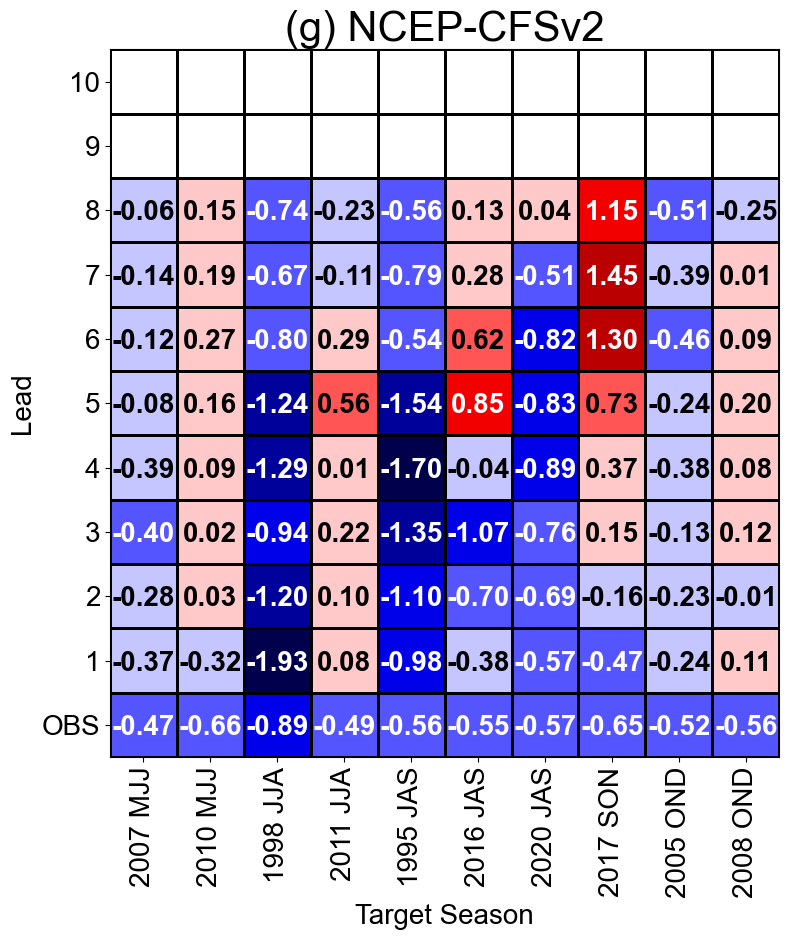

In [213]:


# Extract the x and y values
x = np.arange(len(ncep_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(ncep_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#ustom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar
#cbar.ax.set_xticklabels(['> 1'] + [f'{b:.2f}' for b in boundaries[:1]])

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/ncep_Cold_Onset_ANOM.svg', format='svg')

plt.show()


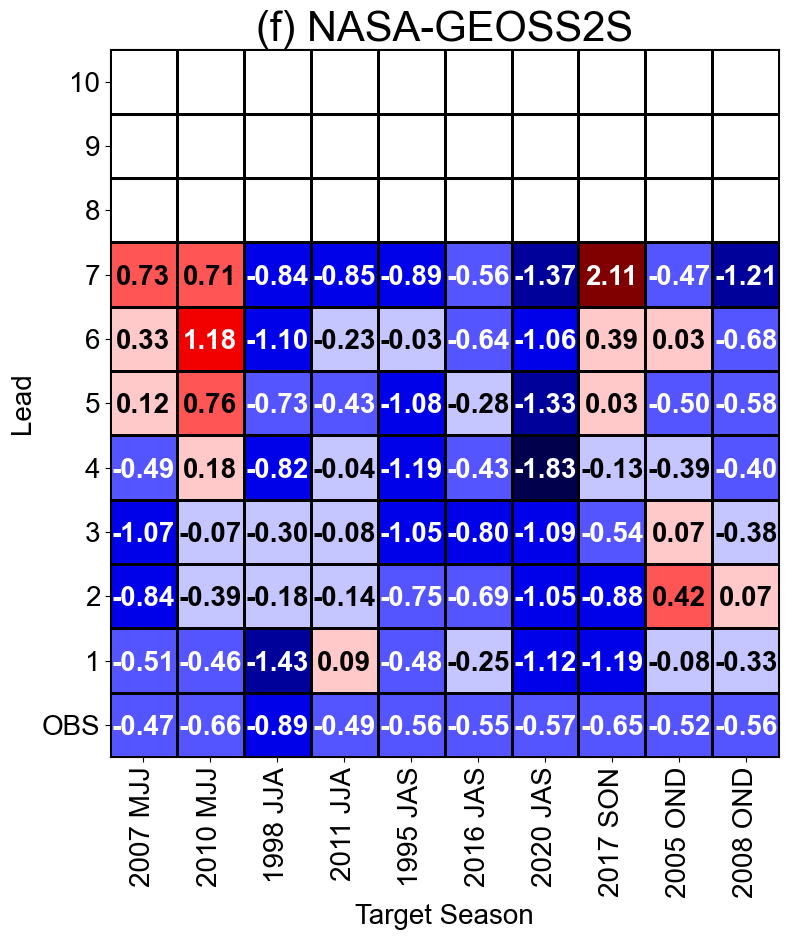

In [214]:
# nasa_cold 

# Extract the x and y values
x = np.arange(len(nasa_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nasa_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4) # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOM_ERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/nasa_Cold_Onset_ANOM.svg', format='svg')

plt.show()


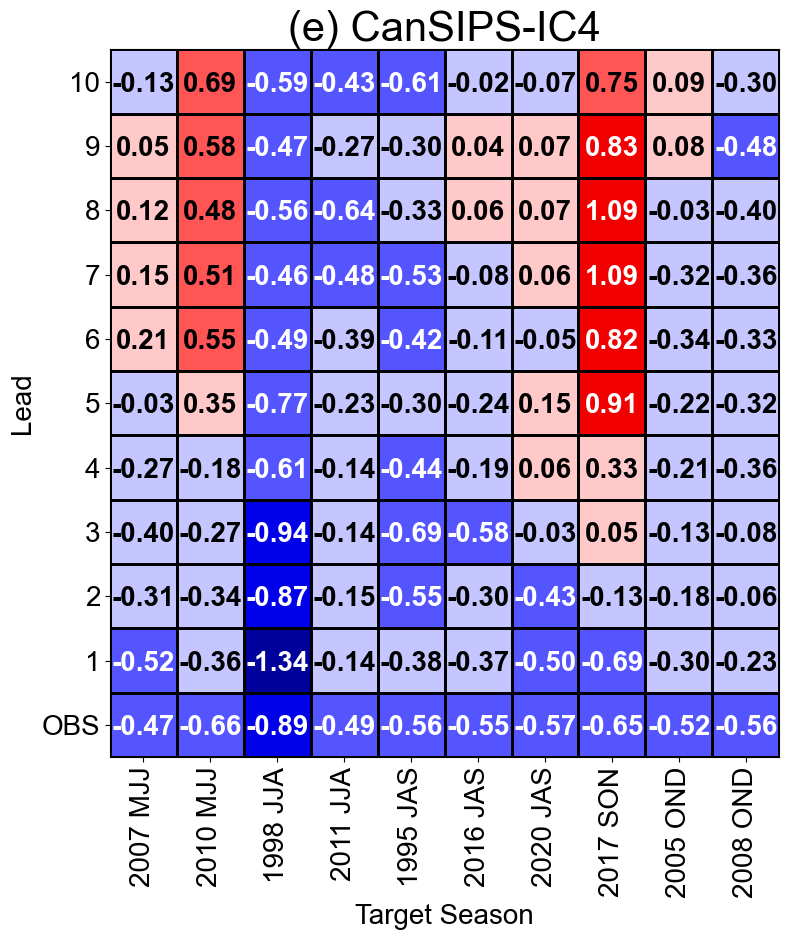

In [215]:
#canada_cold 

# Extract the x and y values
x = np.arange(len(canada_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canada_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOM_ERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/canada_Cold_Onset_ANOM.svg', format='svg')

plt.show()


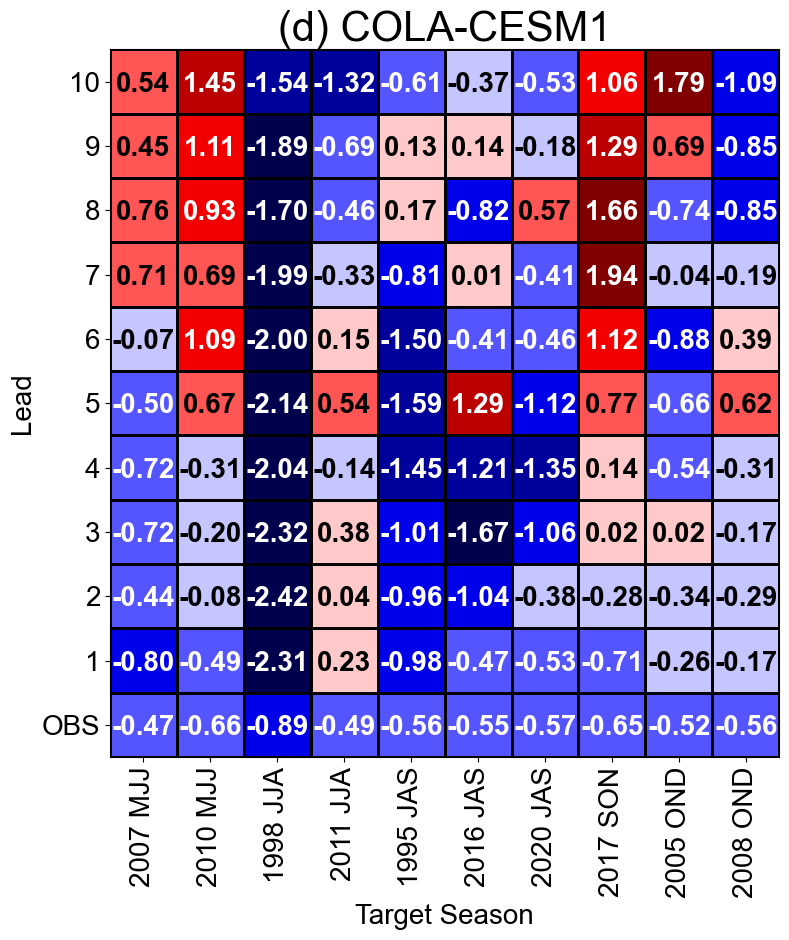

In [216]:
#cola_cold 

# Extract the x and y values
x = np.arange(len(cola_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(cola_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/cola_Cold_Onset_ANOM.svg', format='svg')

plt.show()


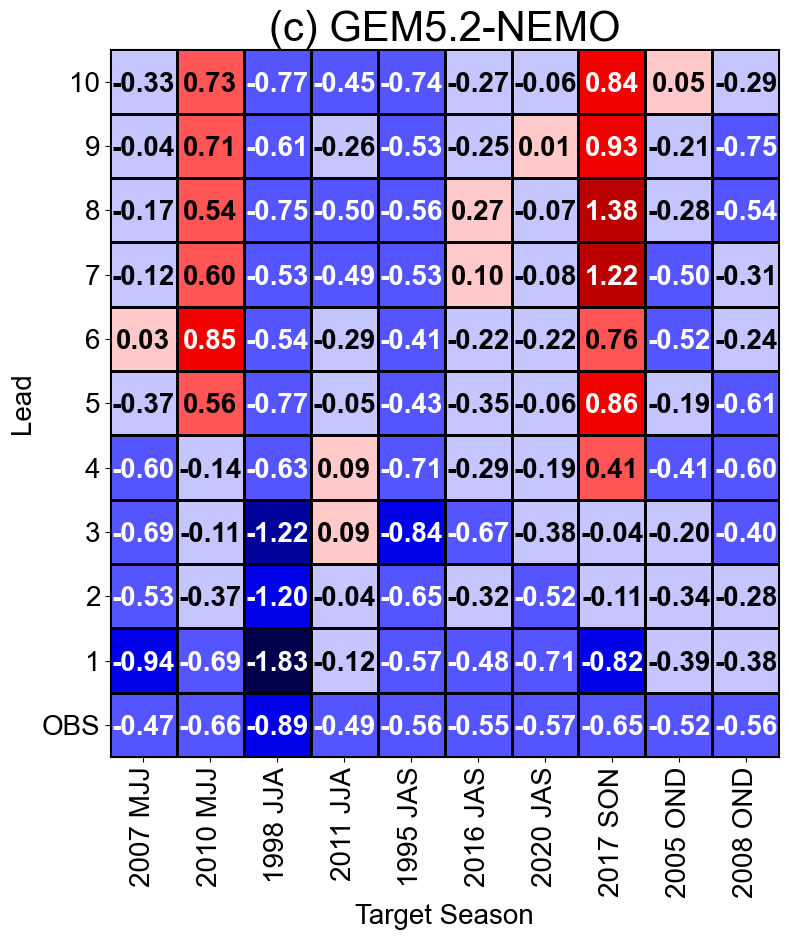

In [217]:
#nemo_cold 

# Extract the x and y values
x = np.arange(len(nemo_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nemo_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/nemo_Cold_Onset_ANOM.svg', format='svg')

plt.show()


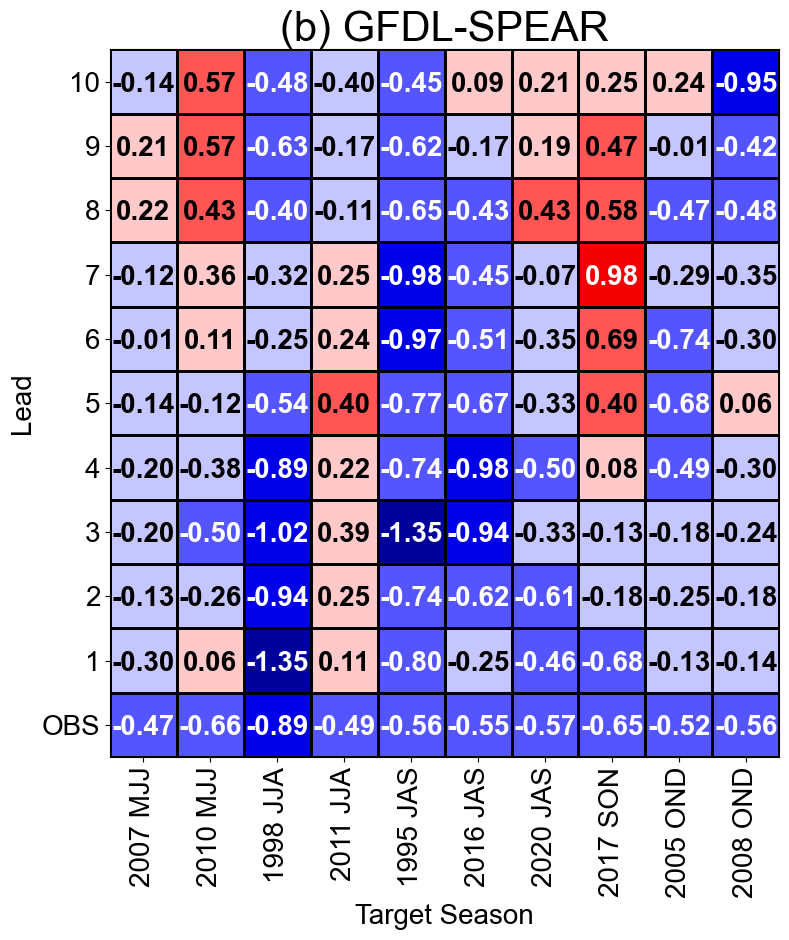

In [218]:
#gfdl_cold 

# Extract the x and y values
x = np.arange(len(gfdl_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(gfdl_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)
boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/gfdl_Cold_Onset_ANOM.svg', format='svg')

plt.show()


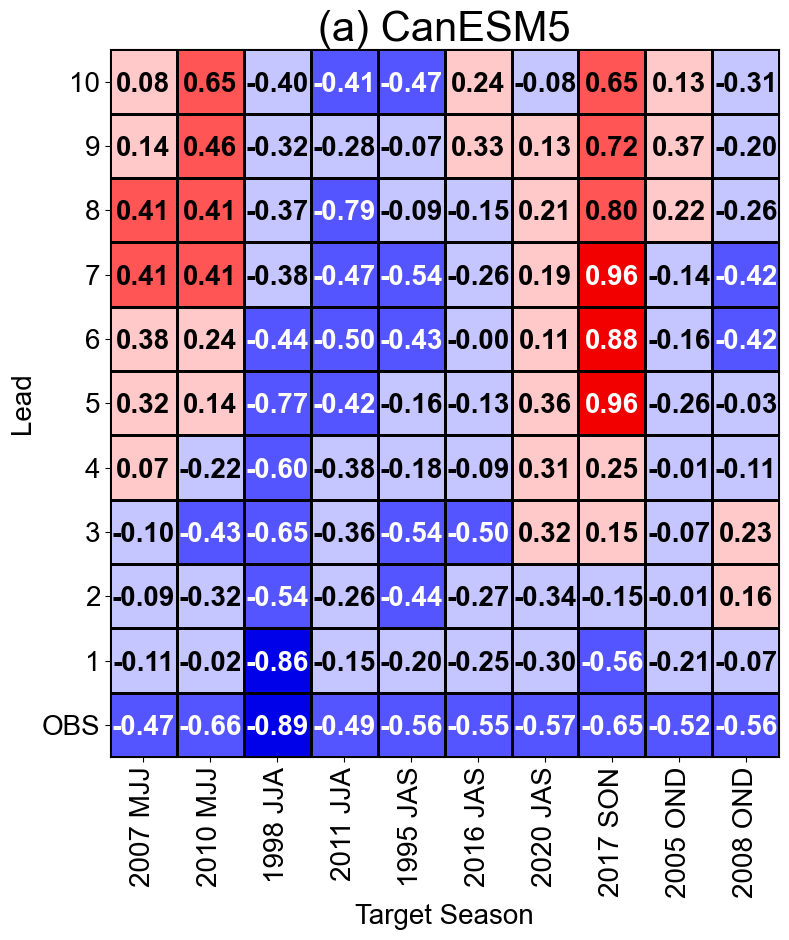

In [219]:
#canesm_cold 

# Extract the x and y values
x = np.arange(len(canesm_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canesm_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/canesm_Cold_Onset_ANOM.svg', format='svg')

plt.show()


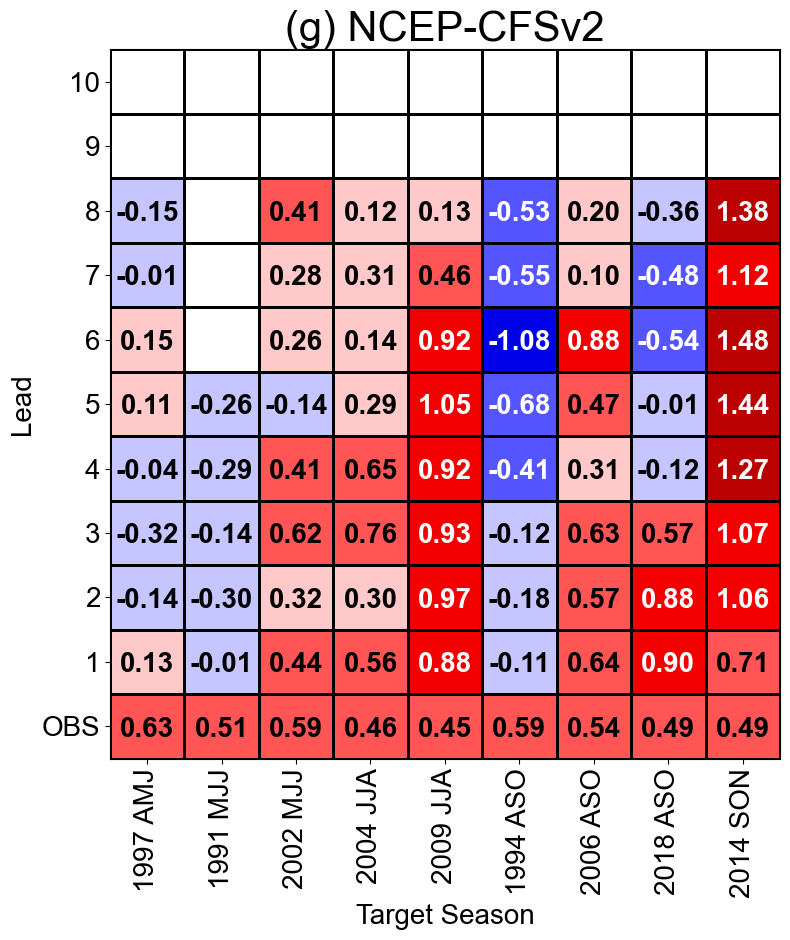

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(ncep_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(ncep_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/ncep_Warm_Onset_ANOM.svg', format='svg')

plt.show()


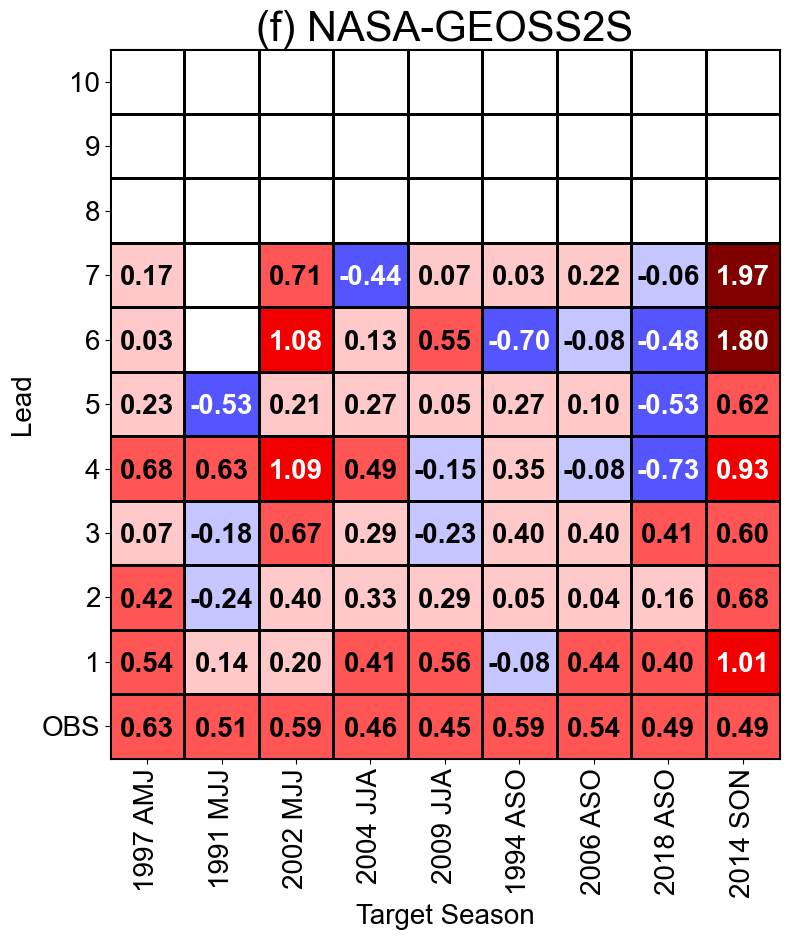

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nasa_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nasa_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/nasa_Warm_Onset_ANOM.svg', format='svg')

plt.show()


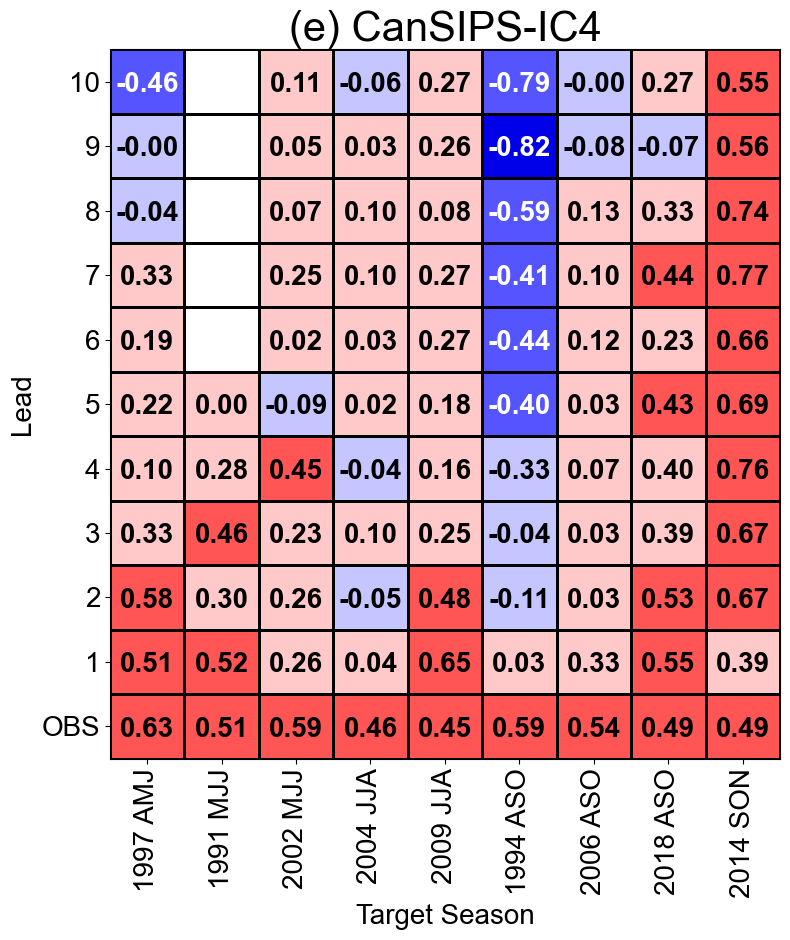

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canada_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canada_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/canada_Warm_Onset_ANOM.svg', format='svg')

plt.show()


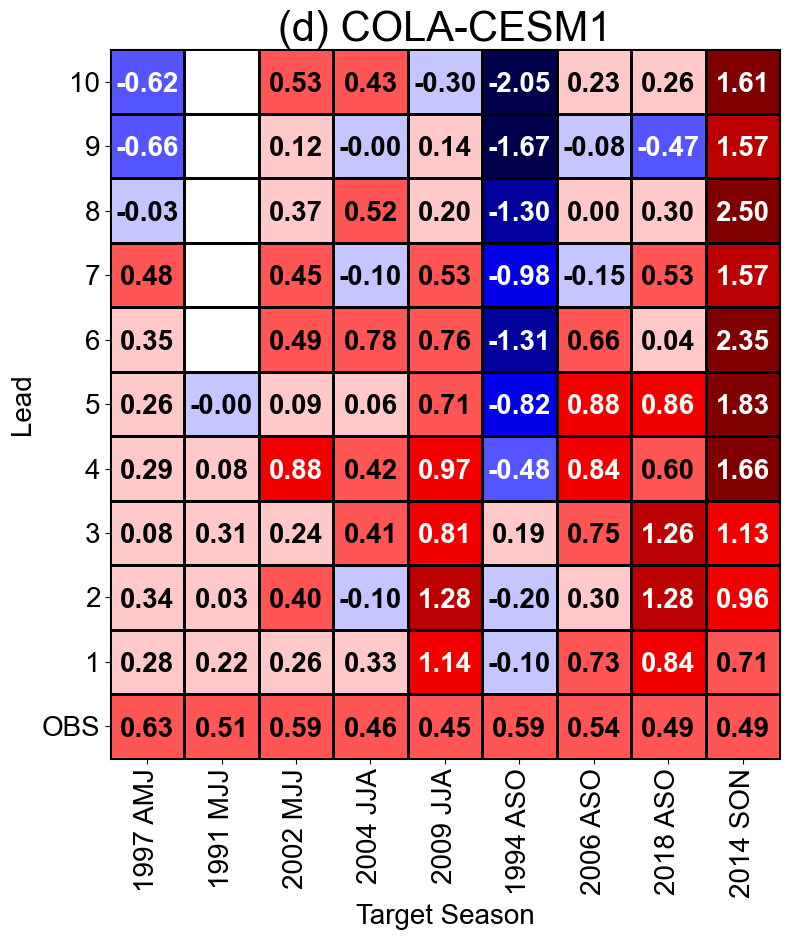

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(cola_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(cola_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color


boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/cola_Warm_Onset_ANOM.svg', format='svg')

plt.show()


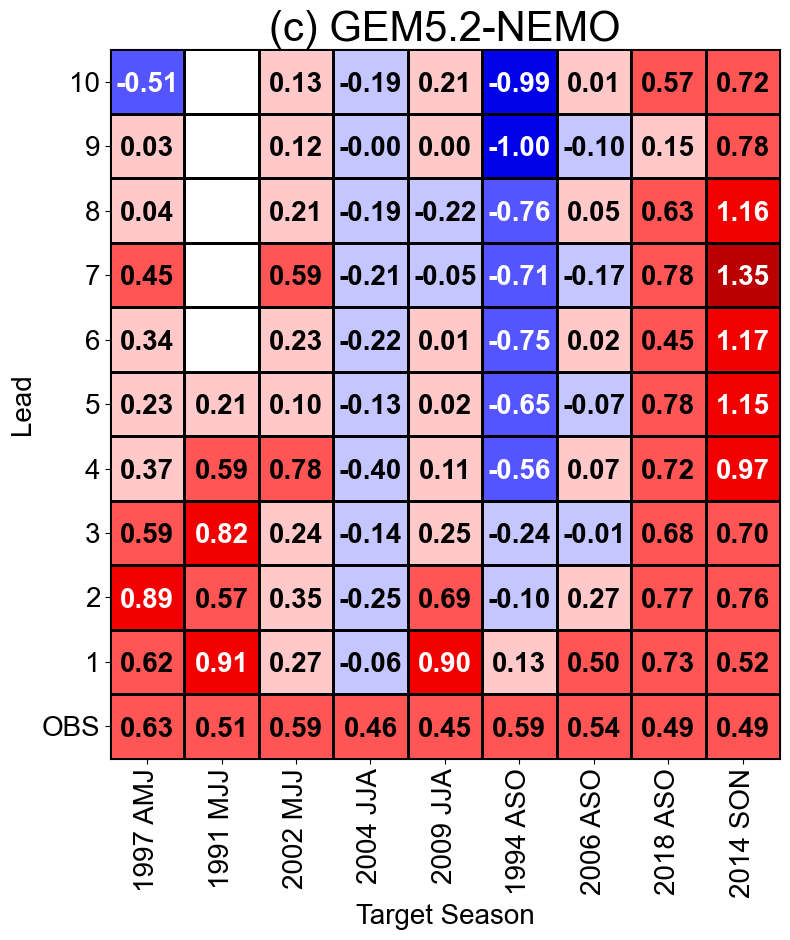

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nemo_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nemo_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')


boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/nemo_Warm_Onset_ANOM.svg', format='svg')

plt.show()


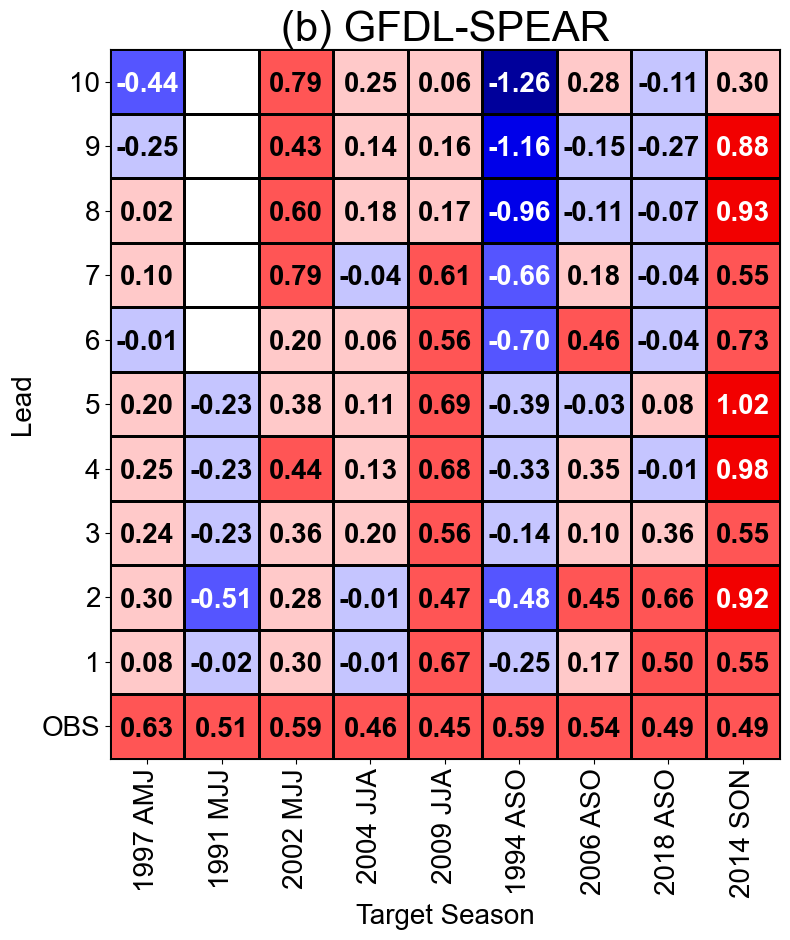

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(gfdl_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(gfdl_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')


boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/gfdl_Warm_Onset_ANOM.svg', format='svg')

plt.show()


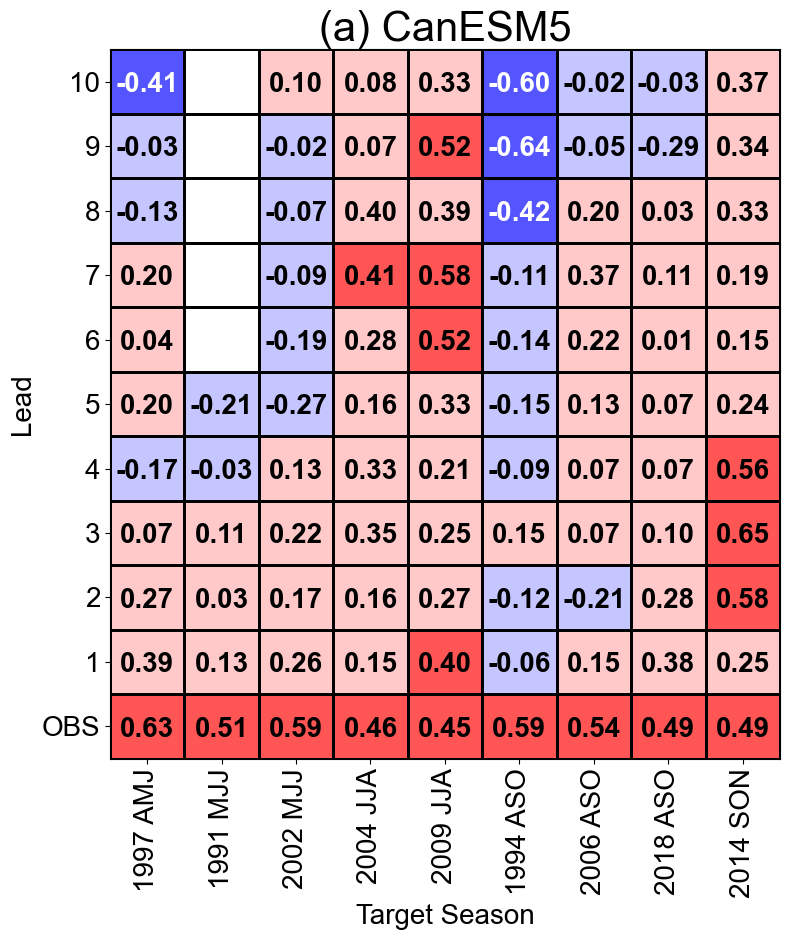

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')


boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/canesm_Warm_Onset_ANOM.svg', format='svg')

plt.show()


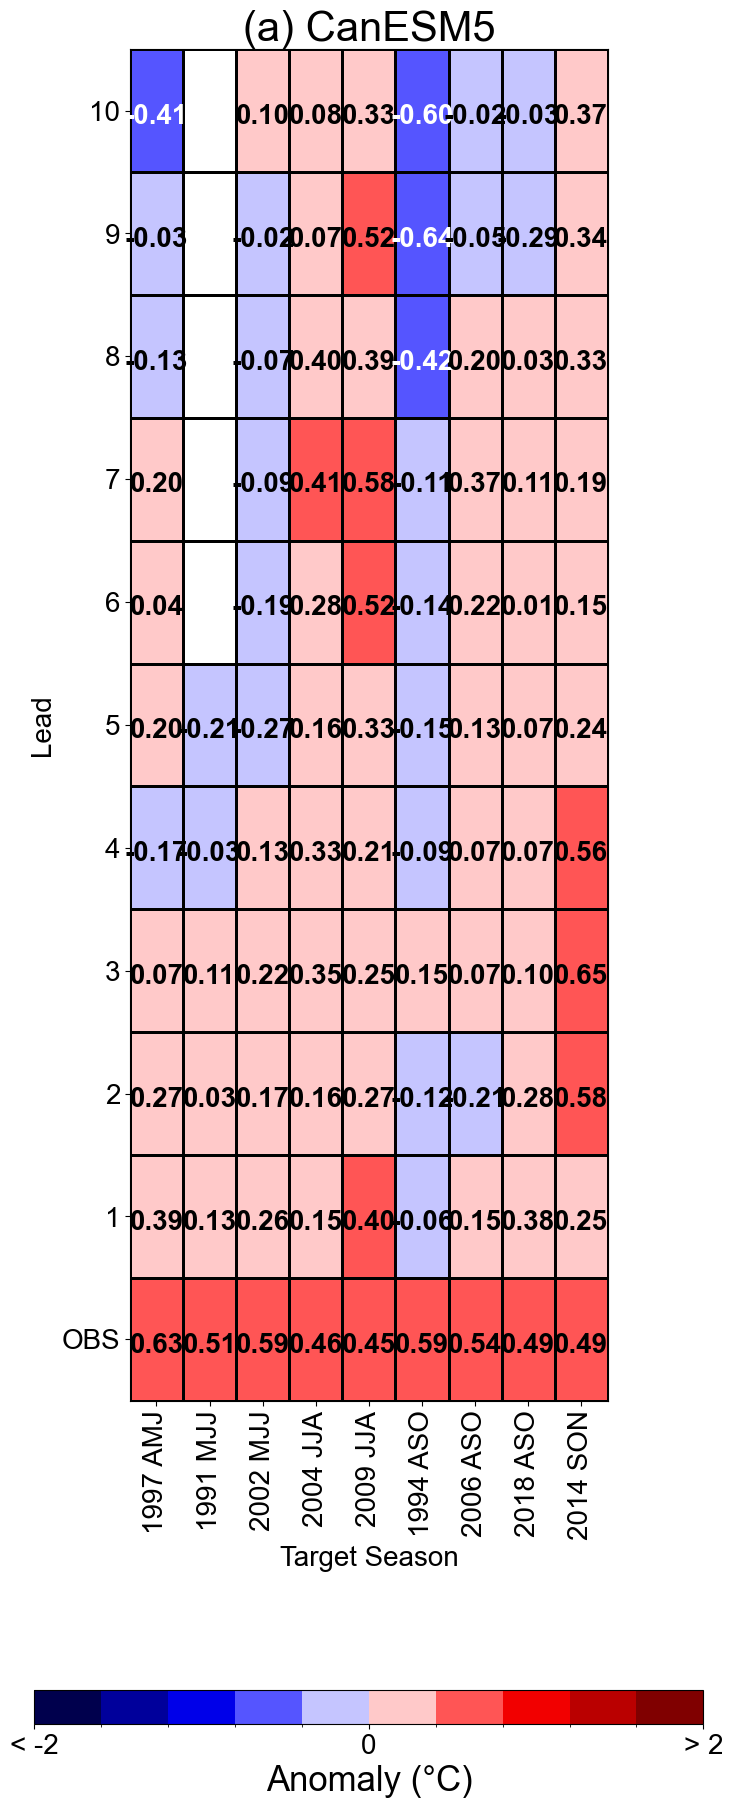

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')

boundaries = np.arange(-2, 2.25, 0.4)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,20))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar with customization options
cbar = plt.colorbar(c, label='Anomaly (°C)', boundaries=boundaries, ticks=boundaries, orientation='horizontal', aspect=20, shrink=1.4)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Anomaly (°C)', fontsize=25)
cbar.set_ticks([-2, 0, 2])  # Define the positions of the ticks
cbar.set_ticklabels(['< -2', '0', '> 2'])  # Set custom labels

# Customize colorbar tick parameters
#cbar.ax.tick_params(labelsize=15, length=10, width=2)  # Change the font size, tick length, and tick width here

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/NEWANOM/ERRORBAR.svg', format='svg')

plt.show()
